### Denoising Autoencoders - 21BAI1007

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

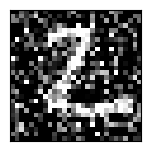

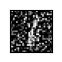

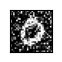

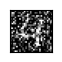

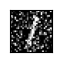

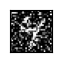

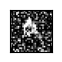

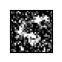

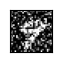

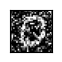

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20, 2))

for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
import keras
from keras import layers
import tensorflow as tf
from keras.callbacks import TensorBoard
encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs = 100, batch_size = 128, shuffle = True, validation_data=(x_test_noisy, x_test),)
encoder = keras.Model(input_img, encoded)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2471 - val_loss: 0.1866
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1680 - val_loss: 0.1534
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1469 - val_loss: 0.1391
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1371 - val_loss: 0.1329
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1320 - val_loss: 0.1290
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1294 - val_loss: 0.1276
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1282 - val_loss: 0.1269
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1276 - val_loss: 0.1263
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1272 - val_loss: 0.1261
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1269 - val_lo

In [ ]:
encoded_input = keras.Input(shape = (encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


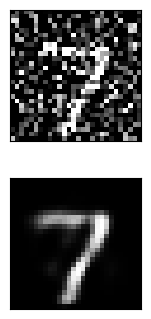

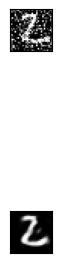

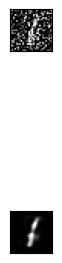

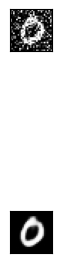

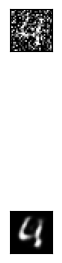

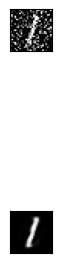

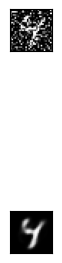

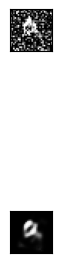

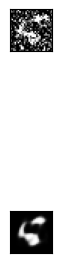

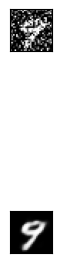

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()